In [1]:
import pandas as pd
import math

In [79]:
# Load dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data", header=None)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [80]:
# Menghapus baris yang memiliki data tak lengkap
df = df.dropna().reset_index(drop=True)
df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [81]:
# Merubah nama atribut kolom
df = df.rename(columns={0: "Age",
          1: "Sex",
          2: "Height",
          3: "Weight",
          4: "QRS duration",
          5: "P-R interval",
          6: "Q-T interval",
          7: "T interval",
          8: "P interval",
          14: "Heartrate",
          279: "Class"})
df

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,9,...,270,271,272,273,274,275,276,277,278,Class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [82]:
# Drop kolom yang tidak dipakai
df = df.drop(pd.concat([df.iloc[:,9:14],df.iloc[:,15:279]]),axis=1)
df

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,Heartrate,Class
0,75,0,190,80,91,193,371,174,121,63,8
1,56,1,165,64,81,174,401,149,39,53,6
2,54,0,172,95,138,163,386,185,102,75,10
3,55,0,175,94,100,202,380,179,143,71,1
4,75,0,190,80,88,181,360,177,103,?,7
...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,63,1
448,37,0,190,85,100,137,361,201,73,73,10
449,36,0,166,68,108,176,365,194,116,84,2
450,32,1,155,55,93,106,386,218,63,80,1


In [83]:
# Menghilangkan data yang memiliki value ?
df = df[df["Heartrate"] != "?"]
df

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,Heartrate,Class
0,75,0,190,80,91,193,371,174,121,63,8
1,56,1,165,64,81,174,401,149,39,53,6
2,54,0,172,95,138,163,386,185,102,75,10
3,55,0,175,94,100,202,380,179,143,71,1
5,13,0,169,51,100,167,321,174,91,84,14
...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,63,1
448,37,0,190,85,100,137,361,201,73,73,10
449,36,0,166,68,108,176,365,194,116,84,2
450,32,1,155,55,93,106,386,218,63,80,1


In [84]:
# mengacak urutan
df = df.sample(451).reset_index(drop=True)
df

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,Heartrate,Class
0,29,0,166,63,81,143,325,218,74,78,1
1,56,1,165,73,90,147,388,178,92,65,1
2,37,1,160,50,74,143,374,146,75,65,1
3,46,1,163,100,90,155,418,162,118,60,1
4,72,1,165,68,93,177,353,139,98,61,1
...,...,...,...,...,...,...,...,...,...,...,...
446,54,1,160,64,71,148,409,139,93,56,6
447,45,1,162,61,75,122,357,143,72,77,1
448,14,0,175,59,96,141,340,225,87,83,1
449,50,1,163,65,75,151,362,137,93,68,1


In [85]:
# Merubah tipe data kolom heartrate dari object menjadi integer
df["Heartrate"] = pd.to_numeric(df["Heartrate"])
if "index" in df.columns:
    df = df.drop("index", axis=1)

In [86]:
def norm(allData, columnTarget):
  for column in columnTarget:
    allData[column] = (allData[column] - allData[column].min()) / (allData[column].max() - allData[column].min())

  return allData

target = df.columns.drop('Class')
normalDf = norm(df,target)
normalDf

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,Heartrate,Class
0,0.349398,0.0,0.090370,0.335294,0.195489,0.272901,0.335740,0.402930,0.360976,0.285714,1
1,0.674699,1.0,0.088889,0.394118,0.263158,0.280534,0.563177,0.256410,0.448780,0.176471,1
2,0.445783,1.0,0.081481,0.258824,0.142857,0.272901,0.512635,0.139194,0.365854,0.176471,1
3,0.554217,1.0,0.085926,0.552941,0.263158,0.295802,0.671480,0.197802,0.575610,0.134454,1
4,0.867470,1.0,0.088889,0.364706,0.285714,0.337786,0.436823,0.113553,0.478049,0.142857,1
...,...,...,...,...,...,...,...,...,...,...,...
446,0.650602,1.0,0.081481,0.341176,0.120301,0.282443,0.638989,0.113553,0.453659,0.100840,6
447,0.542169,1.0,0.084444,0.323529,0.150376,0.232824,0.451264,0.128205,0.351220,0.277311,1
448,0.168675,0.0,0.103704,0.311765,0.308271,0.269084,0.389892,0.428571,0.424390,0.327731,1
449,0.602410,1.0,0.085926,0.347059,0.150376,0.288168,0.469314,0.106227,0.453659,0.201681,1


In [87]:
# Function untuk memisahkan data berdasarkan Class
def split_by_class(data):
    classList = data['Class'].unique()
    result = dict()
    for i in classList:
        result[i] = data[data['Class'] == i]
        result[i].reset_index(drop=True)
    return result

In [88]:
# Memisahkan data berdasarkan Class
dfSplit = split_by_class(normalDf)
for i in dfSplit.keys():
    dfSplit[i] = dfSplit[i].reset_index(drop=True)
dfSplit

{1:           Age  Sex    Height    Weight  QRS duration  P-R interval  \
 0    0.349398  0.0  0.090370  0.335294      0.195489      0.272901   
 1    0.674699  1.0  0.088889  0.394118      0.263158      0.280534   
 2    0.445783  1.0  0.081481  0.258824      0.142857      0.272901   
 3    0.554217  1.0  0.085926  0.552941      0.263158      0.295802   
 4    0.867470  1.0  0.088889  0.364706      0.285714      0.337786   
 ..        ...  ...       ...       ...           ...           ...   
 240  0.771084  0.0  0.081481  0.335294      0.210526      0.000000   
 241  0.542169  1.0  0.084444  0.323529      0.150376      0.232824   
 242  0.168675  0.0  0.103704  0.311765      0.308271      0.269084   
 243  0.602410  1.0  0.085926  0.347059      0.150376      0.288168   
 244  0.361446  0.0  0.091852  0.417647      0.240602      0.312977   
 
      Q-T interval  T interval  P interval  Heartrate  Class  
 0        0.335740    0.402930    0.360976   0.285714      1  
 1        0.56317

In [93]:
# Function rata-rata
def findMean(data, columnTarget):
    mean = dict()
    for i in columnTarget:
        mean[i] = data[i].mean()
    return mean

# Function standard deviation
def findStdev(data,columnTarget):
    stdev = dict()
    for i in columnTarget:
        stdev[i] = data[i].std()
    return stdev

#findStdev(normalDf,normalDf.columns.drop(['Class']))
#findMean(normalDf,normalDf.columns.drop(['Class']))

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,Heartrate,Class
0,0.349398,0.0,0.090370,0.335294,0.195489,0.272901,0.335740,0.402930,0.360976,0.285714,1
1,0.674699,1.0,0.088889,0.394118,0.263158,0.280534,0.563177,0.256410,0.448780,0.176471,1
2,0.445783,1.0,0.081481,0.258824,0.142857,0.272901,0.512635,0.139194,0.365854,0.176471,1
3,0.554217,1.0,0.085926,0.552941,0.263158,0.295802,0.671480,0.197802,0.575610,0.134454,1
4,0.867470,1.0,0.088889,0.364706,0.285714,0.337786,0.436823,0.113553,0.478049,0.142857,1
...,...,...,...,...,...,...,...,...,...,...,...
446,0.650602,1.0,0.081481,0.341176,0.120301,0.282443,0.638989,0.113553,0.453659,0.100840,6
447,0.542169,1.0,0.084444,0.323529,0.150376,0.232824,0.451264,0.128205,0.351220,0.277311,1
448,0.168675,0.0,0.103704,0.311765,0.308271,0.269084,0.389892,0.428571,0.424390,0.327731,1
449,0.602410,1.0,0.085926,0.347059,0.150376,0.288168,0.469314,0.106227,0.453659,0.201681,1


In [113]:
def calc_prb(mean, std, x):
  exponent = math.exp(-((x-mean)**2 / (2 * std**2)))
  return (1 / (math.sqrt(2 * math.pi) * std)) * exponent

In [118]:
def predict(splitTrain, test, columnTargets):
    result = []
    ClassProbs = dict()
    probabilities = dict()
    for Class,trainDf in splitTrain.items():
        probabilities[Class] = {'mean' : findMean(trainDf,columnTargets), 'stdev' : findStdev(trainDf,columnTargets)}
    for i in range(test.shape[0]):
        for Class in probabilities.keys():
            ClassProbs[Class] = 1
        for column in columnTargets:
            for Class,ClassValues in probabilities.items():
                ClassProbs[Class] *= calc_prb(ClassValues['mean'][column], ClassValues['stdev'][column], test[column].iloc[i])
        max = [0,0]
        for Class,Values in ClassProbs.items():
            if max[0] < Values:
                max[0],max[1] = Values,Class
        result.append({"ID" : i, "Diagnostic" : max[1], "Actual" : test['Class'].iloc[i]})
    return result

In [116]:
def evaluation(result, data):
    correct = 0
    for i in result:
        if i["Diagnostic"] == data['Class'].iloc[i["ID"]]:
            correct+=1
    return correct/len(data) 

In [99]:
def folding(dataset, trainingPercentage, location, shuffle:bool):
  lengthTraining = int(len(dataset)*trainingPercentage/100)

  if (shuffle):
    dataset = dataset.sample(frac=1).reset_index(drop =True)
  train = []
  validation = []
  if (location == 'left'):
    train, validation = dataset.iloc[:lengthTraining].reset_index(drop=True), dataset.iloc[lengthTraining:].reset_index(drop=True)
  elif (location == 'right'):
    validation, train = dataset.iloc[:abs(lengthTraining-len(dataset))].reset_index(drop=True), dataset.iloc[abs(lengthTraining-len(dataset)):].reset_index(drop=True)
  elif (location == 'middle'):
    train = dataset.iloc[int(abs(lengthTraining-len(dataset))/2):len(dataset)-int(abs(lengthTraining-len(dataset))/2)]
    validation = pd.concat([dataset.iloc[:int(abs(lengthTraining-len(dataset))/2)],dataset.iloc[len(dataset)-int(abs(lengthTraining-len(dataset))/2):]])
  
  return train, validation

In [122]:
trainDF, testDF = folding(normalDf, 90, 'left', True)
testDF

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,Heartrate,Class
0,0.590361,0.0,0.096296,0.435294,0.353383,0.282443,0.425993,0.219780,0.541463,0.252101,1
1,0.795181,1.0,0.081481,0.694118,0.330827,0.293893,0.350181,0.234432,0.463415,0.420168,1
2,0.289157,1.0,0.085926,0.276471,0.278195,0.299618,0.498195,0.124542,0.331707,0.168067,16
3,0.409639,0.0,0.096296,0.394118,0.293233,0.354962,0.509025,0.424908,0.609756,0.327731,14
4,0.783133,0.0,0.103704,0.347059,0.225564,0.307252,0.509025,0.142857,0.697561,0.285714,3
5,0.469880,1.0,0.081481,0.400000,0.263158,0.297710,0.566787,0.212454,0.512195,0.235294,1
6,0.530120,0.0,0.094815,0.435294,0.406015,0.244275,0.541516,0.318681,0.292683,0.159664,16
7,0.156627,1.0,0.041481,0.141176,0.308271,0.335878,0.447653,0.230769,0.668293,0.436975,16
8,0.686747,1.0,0.090370,0.388235,0.203008,0.345420,0.602888,0.183150,0.385366,0.184874,1
9,0.385542,1.0,0.087407,0.300000,0.165414,0.274809,0.389892,0.146520,0.400000,0.310924,1


In [123]:
trainDFSplit = split_by_class(trainDF)
trainDFSplit

{2:           Age  Sex    Height    Weight  QRS duration  P-R interval  \
 0    0.530120  0.0  0.096296  0.405882      0.285714      0.311069   
 6    0.771084  0.0  0.081481  0.317647      0.240602      0.250000   
 7    0.650602  0.0  0.087407  0.452941      0.390977      0.347328   
 43   0.204819  0.0  0.096296  0.323529      0.315789      0.000000   
 54   0.783133  1.0  0.074074  0.364706      0.097744      0.381679   
 56   0.710843  0.0  0.081481  0.270588      0.278195      0.244275   
 79   0.638554  0.0  0.094815  1.000000      0.421053      0.316794   
 82   0.638554  1.0  0.075556  0.347059      0.135338      0.305344   
 90   0.674699  1.0  0.087407  0.347059      0.263158      0.312977   
 91   0.204819  1.0  0.075556  0.200000      0.165414      0.202290   
 107  0.746988  1.0  0.077037  0.347059      0.195489      0.332061   
 129  0.746988  1.0  0.096296  0.611765      0.315789      0.000000   
 140  0.746988  0.0  0.096296  0.464706      0.413534      0.299618   
 14

In [124]:
columnTargets = trainDF.columns.drop('Class')
result = predict(trainDFSplit, testDF, columnTargets)
accuracy = evaluation(result,testDF)
for i in result:
    print(i)
print(accuracy)

{'ID': 0, 'Diagnostic': 4, 'Actual': 1}
{'ID': 1, 'Diagnostic': 2, 'Actual': 1}
{'ID': 2, 'Diagnostic': 1, 'Actual': 16}
{'ID': 3, 'Diagnostic': 16, 'Actual': 14}
{'ID': 4, 'Diagnostic': 1, 'Actual': 3}
{'ID': 5, 'Diagnostic': 1, 'Actual': 1}
{'ID': 6, 'Diagnostic': 10, 'Actual': 16}
{'ID': 7, 'Diagnostic': 14, 'Actual': 16}
{'ID': 8, 'Diagnostic': 1, 'Actual': 1}
{'ID': 9, 'Diagnostic': 1, 'Actual': 1}
{'ID': 10, 'Diagnostic': 1, 'Actual': 1}
{'ID': 11, 'Diagnostic': 6, 'Actual': 6}
{'ID': 12, 'Diagnostic': 1, 'Actual': 1}
{'ID': 13, 'Diagnostic': 1, 'Actual': 16}
{'ID': 14, 'Diagnostic': 4, 'Actual': 1}
{'ID': 15, 'Diagnostic': 1, 'Actual': 1}
{'ID': 16, 'Diagnostic': 1, 'Actual': 1}
{'ID': 17, 'Diagnostic': 1, 'Actual': 10}
{'ID': 18, 'Diagnostic': 4, 'Actual': 2}
{'ID': 19, 'Diagnostic': 1, 'Actual': 1}
{'ID': 20, 'Diagnostic': 4, 'Actual': 1}
{'ID': 21, 'Diagnostic': 1, 'Actual': 1}
{'ID': 22, 'Diagnostic': 1, 'Actual': 10}
{'ID': 23, 'Diagnostic': 4, 'Actual': 16}
{'ID': 24, 'Dia

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10864\3644401285.py:2: RuntimeWarning: invalid value encountered in scalar divide
  exponent = math.exp(-((x-mean)**2 / (2 * std**2)))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10864\3644401285.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return (1 / (math.sqrt(2 * math.pi) * std)) * exponent
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10864\3644401285.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  exponent = math.exp(-((x-mean)**2 / (2 * std**2)))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10864\3644401285.py:3: RuntimeWarning: invalid value encountered in scalar multiply
  return (1 / (math.sqrt(2 * math.pi) * std)) * exponent


In [129]:
accList = []
for i in range(50,100,5):
    trainDF, testDF = folding(normalDf, i, 'left', True)
    trainDFSplit = split_by_class(trainDF)
    columnTargets = trainDF.columns.drop('Class')
    result = predict(trainDFSplit, testDF, columnTargets)
    accuracy = evaluation(result,testDF)
    accList.append(accuracy)
accList

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10864\3644401285.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  exponent = math.exp(-((x-mean)**2 / (2 * std**2)))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10864\3644401285.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return (1 / (math.sqrt(2 * math.pi) * std)) * exponent
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10864\3644401285.py:3: RuntimeWarning: invalid value encountered in scalar multiply
  return (1 / (math.sqrt(2 * math.pi) * std)) * exponent
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10864\3644401285.py:2: RuntimeWarning: invalid value encountered in scalar divide
  exponent = math.exp(-((x-mean)**2 / (2 * std**2)))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10864\3644401285.py:2: RuntimeWarning: invalid value encountered in scalar divide
  exponent = math.exp(-((x-mean)**2 / (2 * std**2)))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10864\3644401285.py:3: RuntimeWarning: divi

[0.39823008849557523,
 0.3842364532019704,
 0.43646408839779005,
 0.5063291139240507,
 0.4264705882352941,
 0.39823008849557523,
 0.4725274725274725,
 0.5294117647058824,
 0.4782608695652174,
 0.6086956521739131]

<Axes: xlabel='Percentage of train data'>

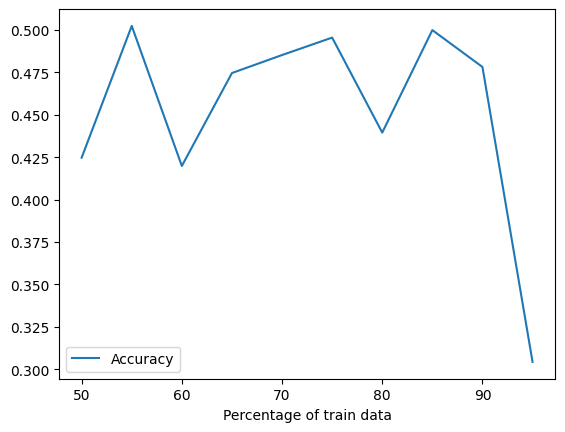

In [128]:
import matplotlib.pyplot
dfAcc = pd.DataFrame(columns=['Accuracy'], data = accList)
dfAcc.index = [50,55,60,65,70,75,80,85,90,95]
dfAcc.index.names = ['Percentage of train data']
dfAcc.plot()